# fetch_market_features.ipynb

In [28]:
import yfinance as yf
import pandas as pd

In [29]:
def fetch_market_features(tickers, start="2007-01-01", end="2025-02-01"):
    """
    Fetch historical stock/commodity data for multiple assets using YFinance.

    Parameters:
        tickers (list): List of tickers to fetch (e.g., ['GDX', 'GLD', 'SLV', 'SPY', 'DX-Y.NYB']).
        start (str): Start date for data in 'YYYY-MM-DD' format.
        end (str): End date for data in 'YYYY-MM-DD' format.

    Returns:
        pd.DataFrame: Combined DataFrame with all market features.
    """
    all_data = []

    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            df = stock.history(start=start, end=end)

            if df.empty:
                print(f"⚠️ Warning: No data found for {ticker}. Skipping...")
                continue

            # Select relevant columns
            df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
            df['Ticker'] = ticker  # Add a Ticker column for identification
            df = df.rename(columns={  # Prefix columns with the ticker for clarity
                "Open": f"{ticker}_Open",
                "High": f"{ticker}_High",
                "Low": f"{ticker}_Low",
                "Close": f"{ticker}_Close",
                "Volume": f"{ticker}_Volume"
            })

            all_data.append(df)

        except Exception as e:
            print(f"⚠️ Error fetching data for {ticker}: {e}")

    # Combine all data into a single DataFrame
    if all_data:
        combined_data = pd.concat(all_data, axis=1)  # Align data horizontally on dates
        combined_data.sort_index(inplace=True)
        return combined_data
    else:
        print("⚠️ Error: No data could be fetched for any ticker.")
        return None


In [30]:
# Example Usage

# Tickers for market data
tickers = ['GDX', 'GLD', 'SLV', '^XAU','SPY', 'USO', 'DX-Y.NYB']  # USD Index as 'DX-Y.NYB'
market_features_data = fetch_market_features(tickers)

# Manually drop the DX-Y.NYB_Volume column if it exists
if "DX-Y.NYB_Volume" in market_features_data.columns:
    market_features_data = market_features_data.drop(columns=["DX-Y.NYB_Volume"])

market_features_data.to_csv("model_files/market_features_data.csv")

⚠️ Error fetching data for GDX: Too Many Requests. Rate limited. Try after a while.
⚠️ Error fetching data for GLD: Too Many Requests. Rate limited. Try after a while.
⚠️ Error fetching data for SLV: Too Many Requests. Rate limited. Try after a while.
⚠️ Error fetching data for ^XAU: Too Many Requests. Rate limited. Try after a while.
⚠️ Error fetching data for SPY: Too Many Requests. Rate limited. Try after a while.
⚠️ Error fetching data for USO: Too Many Requests. Rate limited. Try after a while.
⚠️ Error fetching data for DX-Y.NYB: Too Many Requests. Rate limited. Try after a while.
⚠️ Error: No data could be fetched for any ticker.


AttributeError: AttributeError: 'NoneType' object has no attribute 'columns'

In [12]:
market_features_data.head()

,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,Ticker,GLD_Open,GLD_High,GLD_Low,GLD_Close,...,USO_High,USO_Low,USO_Close,USO_Volume,Ticker,DX-Y.NYB_Open,DX-Y.NYB_High,DX-Y.NYB_Low,DX-Y.NYB_Close,Ticker
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-02 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,83.459999,83.610001,83.150002,83.199997,DX-Y.NYB
2007-01-03 00:00:00-05:00,34.453970,34.479691,32.670835,32.945164,950300.0,GDX,63.580002,64.019997,62.000000,62.279999,...,411.359985,393.040009,395.200012,401713.0,USO,83.269997,84.040001,83.169998,83.919998,DX-Y.NYB
2007-01-04 00:00:00-05:00,32.662257,32.782279,32.173610,32.336494,680300.0,GDX,62.070000,62.500000,61.520000,61.650002,...,391.200012,377.760010,379.119995,557488.0,USO,83.910004,84.389999,83.839996,84.320000,DX-Y.NYB
2007-01-05 00:00:00-05:00,31.419213,32.010733,31.419213,31.899286,1869400.0,GDX,60.750000,60.779999,59.660000,60.169998,...,383.440002,375.119995,382.640015,454100.0,USO,84.290001,84.809998,84.150002,84.629997,DX-Y.NYB
2007-01-08 00:00:00-05:00,31.976446,32.070747,31.522090,31.976446,946000.0,GDX,60.380001,60.540001,59.849998,60.480000,...,392.399994,376.000000,379.920013,493650.0,USO,84.639999,84.839996,84.489998,84.599998,DX-Y.NYB


# fetch_macro_data.ipynb

In [13]:
import pandas as pd
from fredapi import Fred

In [14]:
def fetch_macro_data(start="2007-01-01", end="2025-02-01"):
    """
    Fetch macroeconomic data (e.g., Platinum, Oil, CPI, Real Rates) using the FRED API.

    Parameters:
        start (str): Start date in 'YYYY-MM-DD' format.
        end (str): End date in 'YYYY-MM-DD' format.

    Returns:
        pd.DataFrame: DataFrame containing macroeconomic features.
    """
    fred_api_key = "e89d9530765111bde06d7c924a8a5b8c"  # Replace with your FRED API key
    fred = Fred(api_key=fred_api_key)

    try:
        # Fetch macroeconomic data
        real_rates = fred.get_series("DFII10", start, end)  # 10-Year Treasury Inflation-Indexed Rate
        cpi = fred.get_series("CPIAUCSL", start, end)  # Consumer Price Index
        oil_price = fred.get_series("DCOILWTICO", start, end)  # Daily WTI Crude Oil price

        # Create DataFrame for macroeconomic data
        macro_data = pd.DataFrame({
            "Real_Rates": real_rates,
            "CPI": cpi,
            "Oil_Price": oil_price
        })

        # Ensure proper date format and alignment
        macro_data.index = pd.to_datetime(macro_data.index)
        macro_data = macro_data[start:end]

        return macro_data

    except Exception as e:
        print(f"⚠️ Error fetching macro data: {e}")
        return None

In [15]:
# Example Usage
macro_data = fetch_macro_data()
macro_data.head()

,Real_Rates,CPI,Oil_Price
2007-01-01,NaN,203.437,NaN
2007-01-02,2.38,NaN,60.77
2007-01-03,2.36,NaN,58.31
2007-01-04,2.36,NaN,55.65
2007-01-05,2.38,NaN,56.29


# handle_missing_values.ipynb

In [16]:
import pandas as pd
import numpy as np

In [17]:


def handle_missing_values(df, method="ffill"):
    """
    Handles missing values in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to process.
        method (str): The method to use ("ffill", "bfill", "interpolate", "drop").
    
    Returns:
        pd.DataFrame: Cleaned DataFrame with missing values handled.
    """
    if method == "ffill":
        df = df.fillna(method=method)  # Apply ffill, bfill, or interpolate
        df = df.fillna(method="bfill")  # Ensure no NaNs remain
        return df
    elif method == "bfill":
        df = df.fillna(method="bfill")  # Ensure no NaNs remain
        df = df.fillna(method=method)  # Apply ffill, bfill, or interpolate
        return df
    elif method == "interpolate":
        return df.interpolate(method="linear")  # Linear interpolation
    elif method == "drop":
        return df.dropna()  # Remove missing rows
    else:
        raise ValueError("Invalid method. Choose from 'ffill', 'bfill', 'interpolate', 'drop'.")

In [18]:

# Example Usage
macro_data_cleaned = handle_missing_values(macro_data, method="ffill")
macro_data_cleaned.head()

,Real_Rates,CPI,Oil_Price
2007-01-01,2.38,203.437,60.77
2007-01-02,2.38,203.437,60.77
2007-01-03,2.36,203.437,58.31
2007-01-04,2.36,203.437,55.65
2007-01-05,2.38,203.437,56.29


In [19]:
market_features_data_cleaned = handle_missing_values(market_features_data, method="ffill")
market_features_data_cleaned.head()

,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,Ticker,GLD_Open,GLD_High,GLD_Low,GLD_Close,...,USO_High,USO_Low,USO_Close,USO_Volume,Ticker,DX-Y.NYB_Open,DX-Y.NYB_High,DX-Y.NYB_Low,DX-Y.NYB_Close,Ticker
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-02 00:00:00-05:00,34.453970,34.479691,32.670835,32.945164,950300.0,GDX,63.580002,64.019997,62.000000,62.279999,...,411.359985,393.040009,395.200012,401713.0,USO,83.459999,83.610001,83.150002,83.199997,DX-Y.NYB
2007-01-03 00:00:00-05:00,34.453970,34.479691,32.670835,32.945164,950300.0,GDX,63.580002,64.019997,62.000000,62.279999,...,411.359985,393.040009,395.200012,401713.0,USO,83.269997,84.040001,83.169998,83.919998,DX-Y.NYB
2007-01-04 00:00:00-05:00,32.662257,32.782279,32.173610,32.336494,680300.0,GDX,62.070000,62.500000,61.520000,61.650002,...,391.200012,377.760010,379.119995,557488.0,USO,83.910004,84.389999,83.839996,84.320000,DX-Y.NYB
2007-01-05 00:00:00-05:00,31.419213,32.010733,31.419213,31.899286,1869400.0,GDX,60.750000,60.779999,59.660000,60.169998,...,383.440002,375.119995,382.640015,454100.0,USO,84.290001,84.809998,84.150002,84.629997,DX-Y.NYB
2007-01-08 00:00:00-05:00,31.976446,32.070747,31.522090,31.976446,946000.0,GDX,60.380001,60.540001,59.849998,60.480000,...,392.399994,376.000000,379.920013,493650.0,USO,84.639999,84.839996,84.489998,84.599998,DX-Y.NYB


# merge_data.ipynb

In [20]:
import pandas as pd
import numpy as np

In [21]:
def merge_data(market_data, macro_data):
    """
    Merges the market features dataset and the macroeconomic dataset into a single DataFrame.
    Ensures proper alignment of time series data and handles missing values post-merge.

    Parameters:
        market_data (pd.DataFrame): Cleaned market features data.
        macro_data (pd.DataFrame): Cleaned macroeconomic data.

    Returns:
        pd.DataFrame: Combined dataset with aligned time series data.
    """

    print("\n🔄 Merging Market and Macro Data...")

    # Standardize datetime indices to tz-naive
    market_data.index = pd.to_datetime(market_data.index).tz_localize(None)
    macro_data.index = pd.to_datetime(macro_data.index).tz_localize(None)

    # Ensure both datasets are sorted by date
    market_data = market_data.sort_index()
    macro_data = macro_data.sort_index()

    # Merge datasets on the index (date)
    combined_data = pd.merge(market_data, macro_data, left_index=True, right_index=True, how='outer')

    # Handle any remaining missing values using forward fill (for time-series continuity)
    combined_data = handle_missing_values(combined_data, method="ffill")

    # Drop ticker or other non-numeric columns
    if 'Ticker' in combined_data.columns:
        combined_data = combined_data.drop(columns=['Ticker'])


    print(f"✅ Merge Complete | Final Dataset Shape: {combined_data.shape}")
    return combined_data

In [22]:
# Assuming market_features_data_cleaned and macro_data_cleaned are already prepared
combined_data = merge_data(market_features_data_cleaned, macro_data_cleaned)

# Display a snapshot of the merged data
display(combined_data)


🔄 Merging Market and Macro Data...
✅ Merge Complete | Final Dataset Shape: (4781, 37)


,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,GLD_Open,GLD_High,GLD_Low,GLD_Close,GLD_Volume,...,USO_Low,USO_Close,USO_Volume,DX-Y.NYB_Open,DX-Y.NYB_High,DX-Y.NYB_Low,DX-Y.NYB_Close,Real_Rates,CPI,Oil_Price
2007-01-01,34.453970,34.479691,32.670835,32.945164,950300.0,63.580002,64.019997,62.000000,62.279999,8061900.0,...,393.040009,395.200012,401713.0,83.459999,83.610001,83.150002,83.199997,2.38,203.437,60.77
2007-01-02,34.453970,34.479691,32.670835,32.945164,950300.0,63.580002,64.019997,62.000000,62.279999,8061900.0,...,393.040009,395.200012,401713.0,83.459999,83.610001,83.150002,83.199997,2.38,203.437,60.77
2007-01-03,34.453970,34.479691,32.670835,32.945164,950300.0,63.580002,64.019997,62.000000,62.279999,8061900.0,...,393.040009,395.200012,401713.0,83.269997,84.040001,83.169998,83.919998,2.36,203.437,58.31
2007-01-04,32.662257,32.782279,32.173610,32.336494,680300.0,62.070000,62.500000,61.520000,61.650002,4858600.0,...,377.760010,379.119995,557488.0,83.910004,84.389999,83.839996,84.320000,2.36,203.437,55.65
2007-01-05,31.419213,32.010733,31.419213,31.899286,1869400.0,60.750000,60.779999,59.660000,60.169998,12500100.0,...,375.119995,382.640015,454100.0,84.290001,84.809998,84.150002,84.629997,2.38,203.437,56.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27,37.590000,37.590000,36.849998,37.349998,15489400.0,253.860001,254.259995,251.919998,252.990005,5799800.0,...,77.230003,77.930000,1954800.0,107.470001,107.809998,106.970001,107.339996,2.13,319.086,73.51
2025-01-28,37.480000,37.790001,37.209999,37.700001,10986700.0,254.229996,255.250000,253.889999,255.179993,5332000.0,...,77.809998,78.860001,1592300.0,107.709999,108.050003,107.690002,107.870003,2.13,319.086,74.15
2025-01-29,37.660000,38.250000,37.450001,37.900002,11319800.0,254.550003,254.820007,253.300003,254.199997,5671800.0,...,77.180000,77.779999,1670500.0,107.889999,108.300003,107.750000,108.000000,2.15,319.086,72.94
2025-01-30,38.660000,39.730000,38.570000,39.419998,28590100.0,257.200012,258.290009,256.450012,258.049988,12981200.0,...,77.459999,77.750000,2238600.0,107.860001,108.239998,107.500000,107.800003,2.14,319.086,73.10


# compute_technical_indicators.ipynb

In [23]:
import pandas as pd
import numpy as np

In [24]:


def compute_technical_indicators(df):
    """
    Compute key technical indicators for the dataset.

    Includes:
    - Moving Averages
    - Momentum Indicators (MACD, RSI, BIAS)
    - Volatility Measures (ATR)
    - Relative Valuation Metrics (Ratios)
    - Stochastic Oscillator (KDJ)
    """

    # ==============================
    # 1️⃣ Moving Averages (Momentum)
    # ==============================
    df['SMA_20'] = df['GDX_Close'].rolling(window=20).mean()
    df['SMA_50'] = df['GDX_Close'].rolling(window=50).mean()
    df['SMA_200'] = df['GDX_Close'].rolling(window=200).mean()

    # Rolling volume trends
    df['SMA_Volume_20'] = df['GDX_Volume'].rolling(window=20).mean()

    # ==============================
    # 2️⃣ Momentum Indicators
    # ==============================
    # MACD
    short_ema = df['GDX_Close'].ewm(span=12, adjust=False).mean()
    long_ema = df['GDX_Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = short_ema - long_ema
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # BIAS (Deviation Rate)
    df['BIAS_20'] = (df['GDX_Close'] - df['SMA_20']) / df['SMA_20'] * 100
    df['BIAS_50'] = (df['GDX_Close'] - df['SMA_50']) / df['SMA_50'] * 100

    # RSI
    df['RSI'] = 100 - (100 / (1 + (df['GDX_Close'].diff().where(df['GDX_Close'].diff() > 0, 0).rolling(14).mean() /
                                   (-df['GDX_Close'].diff().where(df['GDX_Close'].diff() < 0, 0).rolling(14).mean()))))

    # ==============================
    # 3️⃣ Volatility Measures
    # ==============================
    df['ATR'] = (df[['GDX_High', 'GDX_Low', 'GDX_Close']].max(axis=1) - df[['GDX_High', 'GDX_Low', 'GDX_Close']].min(axis=1)).rolling(14).mean()

    # ==============================
    # 4️⃣ Relative Valuation Metrics
    # ==============================
    df["Gold_Silver_Ratio"] = df["GLD_Close"] / df["SLV_Close"]
    df["Gold_Oil_Ratio"] = df["GLD_Close"] / df["Oil_Price"]

    # ==============================
    # 5️⃣ Stochastic Oscillator (KDJ)
    # ==============================
    low_14 = df['GDX_Low'].rolling(window=14).min()
    high_14 = df['GDX_High'].rolling(window=14).max()
    df['%K'] = 100 * ((df['GDX_Close'] - low_14) / (high_14 - low_14))
    df['%D'] = df['%K'].rolling(window=3).mean()
    df['%J'] = 3 * df['%K'] - 2 * df['%D']

    # ==============================
    # 6️⃣ Relative Correlations
    # ==============================
    df["Gold_GDX_Corr_30"] = df["GLD_Close"].rolling(window=30).corr(df["GDX_Close"])
    df["Gold_GDX_Corr_60"] = df["GLD_Close"].rolling(window=60).corr(df["GDX_Close"])

    # ==============================
    # Clean-Up
    # ==============================
    # Drop rows with missing values due to rolling computations
    df.dropna(inplace=True)

    return df

In [25]:

# Example Usage
market_data_with_indicators = compute_technical_indicators(combined_data)

# Save results for later use in modeling
market_data_with_indicators.to_csv("model_files/market_data_with_indicators.csv")

# Display first few rows for verification
display(market_data_with_indicators)


,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,GLD_Open,GLD_High,GLD_Low,GLD_Close,GLD_Volume,...,BIAS_50,RSI,ATR,Gold_Silver_Ratio,Gold_Oil_Ratio,%K,%D,%J,Gold_GDX_Corr_30,Gold_GDX_Corr_60
2007-10-02,38.183135,38.920394,37.128684,37.548748,2634900.0,72.449997,72.680000,71.629997,72.349998,10720000.0,...,9.410837,58.290443,0.947291,5.468218,0.904375,52.631619,79.207960,-0.521064,0.990238,0.831044
2007-10-03,38.003107,38.080259,37.231556,37.360149,1442000.0,72.250000,72.650002,71.349998,71.900002,8186000.0,...,8.683197,56.912222,0.960151,5.439964,0.899087,47.807126,65.789520,11.842337,0.989518,0.841655
2007-10-04,37.231552,38.037392,36.751476,38.037392,1849300.0,71.800003,73.059998,71.239998,72.870003,9178500.0,...,10.358854,60.318923,0.984032,5.485134,0.894330,65.131487,55.190077,85.014306,0.988243,0.853692
2007-10-05,37.917370,39.083267,37.883078,39.083267,2217500.0,72.800003,73.639999,71.879997,73.400002,10597200.0,...,13.084447,64.502482,1.017098,5.520873,0.903941,91.885761,68.274791,139.107700,0.987817,0.868240
2007-10-08,38.577471,38.757499,37.908796,38.251705,606000.0,72.660004,72.889999,72.279999,72.529999,3447600.0,...,10.422017,54.481527,0.941168,5.499697,0.918450,56.633962,71.217070,27.467746,0.987342,0.878886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27,37.590000,37.590000,36.849998,37.349998,15489400.0,253.860001,254.259995,251.919998,252.990005,5799800.0,...,3.276466,72.548968,0.748572,9.213038,3.441573,73.529379,83.855236,52.877663,0.969455,0.667425
2025-01-28,37.480000,37.790001,37.209999,37.700001,10986700.0,254.229996,255.250000,253.889999,255.179993,5332000.0,...,4.220183,69.565167,0.739286,9.235613,3.441402,84.967357,84.037929,86.826213,0.976688,0.680239
2025-01-29,37.660000,38.250000,37.450001,37.900002,11319800.0,254.550003,254.820007,253.300003,254.199997,5671800.0,...,4.761344,70.833287,0.745714,9.078571,3.485056,88.888943,82.461893,101.743043,0.978986,0.686588
2025-01-30,38.660000,39.730000,38.570000,39.419998,28590100.0,257.200012,258.290009,256.450012,258.049988,12981200.0,...,8.867500,77.599942,0.745714,8.985028,3.530096,93.304508,89.053602,101.806318,0.980014,0.721715


# split_data.ipynb

In [1]:
from sklearn.model_selection import train_test_split

In [14]:
def set_target_and_shift(df, target_col="GDX_Close"):
    """
    Sets the target variable by shifting the dataset to predict the next day’s return
    (i.e. percentage change from day i to day i+1).
    Removes rows with NaN values caused by the shift.
    """

    df["target"] = df[target_col].shift(-1)

    # 2) Drop rows where shift caused NaNs (usually the last row)
    df = df.dropna(subset=["target"]).copy()

    return df

In [15]:
def split_data(df, test_size=0.2):
    """
    Splits the data into training and testing sets chronologically.
    Returns X_train, X_test, y_train, y_test, after dropping the 'target' column from features.
    """
    # For chronological split, compute index
    split_index = int(len(df) * (1 - test_size))

    # Separate features (everything except target) and target
    X = df.drop(columns=["target"])
    y = df["target"]

    # Chronological split
    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]

    return X_train, X_test, y_train, y_test

In [16]:
# Example Usage
market_data_with_indicators = pd.read_csv("model_files/market_data_with_indicators.csv", index_col=0)
market_data_shifted = set_target_and_shift(market_data_with_indicators, target_col='GDX_Close')

X_train, X_test, y_train, y_test = split_data(market_data_shifted)

# ✅ Check dataset shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3664, 54)
X_test shape: (917, 54)
y_train shape: (3664,)
y_test shape: (917,)


In [17]:


# Check time series continuity
print("X_train first date:", X_train.index.min())
print("X_train last date:", X_train.index.max())
print("X_test first date:", X_test.index.min())
print("X_test last date:", X_test.index.max())

# Ensure y_train and y_test are aligned with X_train and X_test
assert all(y_train.index == X_train.index), "Mismatch in training set indices!"
assert all(y_test.index == X_test.index), "Mismatch in test set indices!"

X_train first date: 2007-10-02
X_train last date: 2021-08-10
X_test first date: 2021-08-11
X_test last date: 2025-01-30


In [18]:

display(X_train)

,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,GLD_Open,GLD_High,GLD_Low,GLD_Close,GLD_Volume,...,BIAS_50,RSI,ATR,Gold_Silver_Ratio,Gold_Oil_Ratio,%K,%D,%J,Gold_GDX_Corr_30,Gold_GDX_Corr_60
2007-10-02,38.183135,38.920394,37.128684,37.548748,2634900.0,72.449997,72.680000,71.629997,72.349998,10720000.0,...,9.410837,58.290443,0.947291,5.468218,0.904375,52.631619,79.207960,-0.521064,0.990238,0.831044
2007-10-03,38.003107,38.080259,37.231556,37.360149,1442000.0,72.250000,72.650002,71.349998,71.900002,8186000.0,...,8.683197,56.912222,0.960151,5.439964,0.899087,47.807126,65.789520,11.842337,0.989518,0.841655
2007-10-04,37.231552,38.037392,36.751476,38.037392,1849300.0,71.800003,73.059998,71.239998,72.870003,9178500.0,...,10.358854,60.318923,0.984032,5.485134,0.894330,65.131487,55.190077,85.014306,0.988243,0.853692
2007-10-05,37.917370,39.083267,37.883078,39.083267,2217500.0,72.800003,73.639999,71.879997,73.400002,10597200.0,...,13.084447,64.502482,1.017098,5.520873,0.903941,91.885761,68.274791,139.107700,0.987817,0.868240
2007-10-08,38.577471,38.757499,37.908796,38.251705,606000.0,72.660004,72.889999,72.279999,72.529999,3447600.0,...,10.422017,54.481527,0.941168,5.499697,0.918450,56.633962,71.217070,27.467746,0.987342,0.878886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-04,33.457236,33.663995,32.667795,32.686592,16927200.0,171.279999,171.399994,168.990005,169.529999,9796300.0,...,-1.836279,59.641189,0.610876,7.201784,2.486142,64.745679,76.648464,40.940110,0.377246,0.922009
2021-08-05,32.677200,32.742987,32.122712,32.197895,14194100.0,169.369995,169.440002,168.199997,168.860001,8015000.0,...,-3.021451,62.588164,0.598793,7.247211,2.443705,46.207032,66.584233,5.452631,0.406223,0.923789
2021-08-06,31.370867,31.474247,30.891562,31.239294,34008700.0,165.839996,165.929993,164.550003,164.639999,13547600.0,...,-5.578360,49.418683,0.589395,7.310835,2.411954,12.542495,41.165069,-44.702652,0.475051,0.928663
2021-08-09,30.825769,31.088919,30.440447,30.478041,29020200.0,163.009995,163.289993,161.259995,161.720001,11547000.0,...,-7.508291,39.469055,0.584696,7.435402,2.429688,1.166208,19.971912,-36.445200,0.611757,0.932030


In [19]:
display(X_test)

,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,GLD_Open,GLD_High,GLD_Low,GLD_Close,GLD_Volume,...,BIAS_50,RSI,ATR,Gold_Silver_Ratio,Gold_Oil_Ratio,%K,%D,%J,Gold_GDX_Corr_30,Gold_GDX_Corr_60
2021-08-11,30.478045,30.919757,30.440451,30.694201,22827000.0,163.149994,164.169998,162.679993,164.000000,7382400.0,...,-6.154814,46.067452,0.586039,7.509157,2.366522,18.974438,7.568253,41.786806,0.764521,0.937084
2021-08-12,30.515639,30.515639,29.979946,30.224297,17913100.0,163.649994,164.100006,162.929993,164.039993,5211700.0,...,-7.243961,39.498479,0.573956,7.629767,2.373264,6.632670,9.390407,1.117196,0.804573,0.938795
2021-08-13,30.619016,30.976141,30.525033,30.844568,16207000.0,165.020004,166.460007,164.889999,166.389999,7466900.0,...,-5.020982,43.731793,0.576641,7.573510,2.434026,23.469351,16.358820,37.690414,0.821816,0.938604
2021-08-16,30.882163,30.957346,30.496841,30.675404,12143000.0,166.729996,167.389999,166.589996,167.220001,7776500.0,...,-5.242437,38.131755,0.555160,7.566516,2.479537,18.877538,16.326520,23.979575,0.821747,0.933896
2021-08-17,30.572022,30.694198,30.083320,30.308876,20321200.0,167.289993,167.729996,166.559998,166.970001,7107000.0,...,-6.061033,26.655655,0.553817,7.624201,2.510827,8.928499,17.091796,-7.398095,0.811878,0.928082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24,37.990002,38.160000,37.840000,37.950001,13728000.0,255.960007,257.070007,255.610001,255.649994,7341300.0,...,4.930283,83.903375,0.766429,9.159799,3.410031,93.617051,87.768478,105.314196,0.961902,0.691382
2025-01-27,37.590000,37.590000,36.849998,37.349998,15489400.0,253.860001,254.259995,251.919998,252.990005,5799800.0,...,3.276466,72.548968,0.748572,9.213038,3.441573,73.529379,83.855236,52.877663,0.969455,0.667425
2025-01-28,37.480000,37.790001,37.209999,37.700001,10986700.0,254.229996,255.250000,253.889999,255.179993,5332000.0,...,4.220183,69.565167,0.739286,9.235613,3.441402,84.967357,84.037929,86.826213,0.976688,0.680239
2025-01-29,37.660000,38.250000,37.450001,37.900002,11319800.0,254.550003,254.820007,253.300003,254.199997,5671800.0,...,4.761344,70.833287,0.745714,9.078571,3.485056,88.888943,82.461893,101.743043,0.978986,0.686588


In [151]:
display(y_train)

2007-10-02   -0.005035
2007-10-03    0.017965
2007-10-04    0.027125
2007-10-05   -0.021506
2007-10-08    0.025884
                ...   
2021-08-04   -0.015064
2021-08-05   -0.030224
2021-08-06   -0.024670
2021-08-09   -0.012723
2021-08-10    0.019790
Name: target, Length: 3664, dtype: float64

In [152]:
display(y_test)

2021-08-11   -0.015428
2021-08-12    0.020315
2021-08-13   -0.005500
2021-08-16   -0.012021
2021-08-17   -0.023848
                ...   
2025-01-24   -0.015937
2025-01-27    0.009327
2025-01-28    0.005291
2025-01-29    0.039322
2025-01-30   -0.011738
Name: target, Length: 917, dtype: float64

# scale_features.ipynb

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

In [21]:
def scale_features(X_train, X_test):
    """
    Scales numerical features in X_train and X_test using StandardScaler.

    Parameters:
    X_train (pd.DataFrame): Training feature set.
    X_test (pd.DataFrame): Testing feature set.

    Returns:
    X_train_scaled, X_test_scaled, scalers: Scaled datasets and scaler objects.
    """
    print("\n🔄 Scaling Features...\n")
    
    # Identify numeric columns
    numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

    # Initialize scaler
    scaler = StandardScaler()

    # Fit scaler on training data
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]), 
                                  index=X_train.index, columns=numeric_cols)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]), 
                                 index=X_test.index, columns=numeric_cols)

    print(f"✅ Scaling Complete | Scaled Training Shape: {X_train_scaled.shape}")
    return X_train_scaled, X_test_scaled, scaler

In [22]:
# Example Usage
X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)

# Save scaled datasets for later use
X_train_scaled.to_csv("model_files/X_train_scaled.csv")
X_test_scaled.to_csv("model_files/X_test_scaled.csv")
y_train.to_csv("model_files/y_train.csv")
y_test.to_csv("model_files/y_test.csv")


🔄 Scaling Features...

✅ Scaling Complete | Scaled Training Shape: (3664, 54)


In [23]:

# Display first few rows for verification
display(X_train_scaled)

,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,GLD_Open,GLD_High,GLD_Low,GLD_Close,GLD_Volume,...,BIAS_50,RSI,ATR,Gold_Silver_Ratio,Gold_Oil_Ratio,%K,%D,%J,Gold_GDX_Corr_30,Gold_GDX_Corr_60
2007-10-02,0.694863,0.717668,0.652311,0.643326,-1.041669,-2.102010,-2.112581,-2.115853,-2.106238,-0.021314,...,1.014121,0.521094,0.187978,-1.025722,-1.069848,0.080971,1.008026,-1.084446,0.929919,0.035089
2007-10-03,0.679092,0.644761,0.661451,0.626779,-1.083681,-2.109663,-2.113726,-2.126612,-2.123464,-0.379716,...,0.934584,0.434000,0.216793,-1.046516,-1.074803,-0.074483,0.542637,-0.819423,0.926351,0.093943
2007-10-04,0.611504,0.641041,0.618793,0.686200,-1.069337,-2.126884,-2.098070,-2.130838,-2.086332,-0.239339,...,1.117746,0.649281,0.270304,-1.013273,-1.079260,0.483740,0.175020,0.749102,0.920029,0.160708
2007-10-05,0.671582,0.731803,0.719343,0.777965,-1.056369,-2.088615,-2.075922,-2.106248,-2.066044,-0.038682,...,1.415674,0.913653,0.344398,-0.986970,-1.070255,1.345814,0.628833,1.908656,0.917919,0.241400
2007-10-08,0.729407,0.703532,0.721628,0.705004,-1.113124,-2.093973,-2.104561,-2.090878,-2.099348,-1.049902,...,1.124650,0.280397,0.174257,-1.002555,-1.056660,0.209934,0.730880,-0.484474,0.915565,0.300446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-04,0.280873,0.261517,0.255933,0.216720,-0.538314,1.680118,1.657187,1.625017,1.613789,-0.151959,...,-0.215275,0.606452,-0.565844,0.250122,0.412246,0.471309,0.919255,-0.195679,-2.107534,0.539628
2021-08-05,0.212542,0.181592,0.207499,0.173842,-0.634570,1.607024,1.582342,1.594662,1.588142,-0.403902,...,-0.344824,0.792681,-0.592919,0.283554,0.372483,-0.126041,0.570200,-0.956393,-1.963946,0.549505
2021-08-06,0.098107,0.071490,0.098104,0.089734,0.063273,1.471935,1.448307,1.454418,1.426601,0.378615,...,-0.624313,-0.039541,-0.613978,0.330379,0.342733,-1.210777,-0.311406,-2.031529,-1.622895,0.576535
2021-08-09,0.050357,0.038052,0.058019,0.022942,-0.112415,1.363633,1.347495,1.328006,1.314824,0.095655,...,-0.835270,-0.668290,-0.624507,0.422057,0.359349,-1.577342,-1.046443,-1.854521,-0.945499,0.595212


In [24]:
display(X_test_scaled)

,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,GLD_Open,GLD_High,GLD_Low,GLD_Close,GLD_Volume,...,BIAS_50,RSI,ATR,Gold_Silver_Ratio,Gold_Oil_Ratio,%K,%D,%J,Gold_GDX_Corr_30,Gold_GDX_Corr_60
2021-08-11,0.019896,0.023372,0.058020,0.041908,-0.330531,1.368991,1.381099,1.382567,1.402102,-0.493375,...,-0.687324,-0.251316,-0.621498,0.476338,0.300164,-1.003527,-1.476636,-0.177529,-0.188538,0.623244
2021-08-12,0.023189,-0.011698,0.017101,0.000678,-0.503592,1.388126,1.378426,1.392172,1.403633,-0.800393,...,-0.806376,-0.666430,-0.648574,0.565102,0.306481,-1.401202,-1.413439,-1.049328,0.009923,0.632734
2021-08-13,0.032245,0.028265,0.065535,0.055101,-0.563678,1.440555,1.468546,1.467482,1.493591,-0.481423,...,-0.563388,-0.398913,-0.642557,0.523699,0.363414,-0.858693,-1.171755,-0.265340,0.095368,0.631674
2021-08-16,0.055297,0.026634,0.063030,0.040259,-0.706807,1.505994,1.504059,1.532801,1.525363,-0.437634,...,-0.587594,-0.752798,-0.690691,0.518551,0.406058,-1.006650,-1.172876,-0.559247,0.095024,0.605565
2021-08-17,0.028128,0.003798,0.026286,0.008099,-0.418782,1.527425,1.517042,1.531648,1.515793,-0.532327,...,-0.677073,-1.478009,-0.693699,0.561006,0.435376,-1.327227,-1.146334,-1.231863,0.046122,0.573315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24,0.677944,0.651681,0.715515,0.678532,-0.650985,4.920740,4.928621,4.953222,4.910442,-0.499188,...,0.524362,2.139658,-0.217289,1.691152,1.277918,1.401599,1.304928,1.184253,0.789510,-0.739549
2025-01-27,0.642904,0.602217,0.627548,0.625888,-0.588951,4.840375,4.821317,4.811441,4.808618,-0.717214,...,0.343587,1.422136,-0.257303,1.730334,1.307472,0.754336,1.169206,0.060217,0.826935,-0.872425
2025-01-28,0.633268,0.619573,0.659536,0.656597,-0.747530,4.854534,4.859122,4.887135,4.892451,-0.783378,...,0.446742,1.233580,-0.278110,1.746949,1.307313,1.122890,1.175542,0.787942,0.862777,-0.801350
2025-01-29,0.649036,0.659492,0.680862,0.674145,-0.735799,4.866781,4.842702,4.864465,4.854937,-0.735318,...,0.505895,1.313717,-0.263705,1.631371,1.348216,1.249251,1.120881,1.107702,0.874162,-0.766138


# compare_models.ipynb

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from scipy.stats import pearsonr
import joblib

In [27]:


def model_comparison(models, X_train, X_test, y_train, y_test):
    """
    Compare multiple models and visualize predictions.
    
    Parameters:
    models (dict): Dictionary of model names and initialized model objects.
    X_train, X_test: Features for training and testing.
    y_train, y_test: Target variables for training and testing.
    """
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
    axes = axes.flatten()
    
    rmse_scores = {}
    ic_scores = {}

    # Ensure y_test index is a datetime type
    y_test.index = pd.to_datetime(y_test.index)

    
    for i, (name, model) in enumerate(models.items()):

        # Train model
        model.fit(X_train, y_train)
        # Predict on test set
        y_pred = model.predict(X_test)
        #Save Model
        joblib.dump(model, f"model_files/{name.replace(' ', '_').lower()}_model.pkl")

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores[name] = rmse
        # Compute Information Coefficient (IC)
        ic = pearsonr(y_test, y_pred)[0]  # Extract the correlation coefficient
        ic_scores[name] = ic
        
        # Plot actual vs predicted
        axes[i].plot(y_test.index, y_test, label='Actual', color='gold')
        axes[i].plot(y_test.index, y_pred, label='Predicted', color='red')
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[i].xaxis.set_major_locator(mdates.YearLocator())
        axes[i].set_title(f"{name} - RMSE: {rmse:.4f}")
        axes[i].set_xlabel("Date")
        axes[i].set_ylabel("Price")
        axes[i].legend(loc='upper left')
    
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    # Print RMSE scores
    print("\nModel RMSE & IC Scores:")
    for name, score in rmse_scores.items():
        print(f"{name} - RMSE: {score:.4f}, IC: {ic_scores[name]:.4f}")

In [28]:
!pip install xgboost lightgbm

from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': RidgeCV(gcv_mode='auto'),
    'Lasso': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='linear'),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
}

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 100.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [29]:
X_train_scaled = pd.read_csv("model_files/X_train_scaled.csv", index_col=0)
X_test_scaled = pd.read_csv("model_files/X_test_scaled.csv", index_col=0)
y_train = pd.read_csv("model_files/y_train.csv", index_col=0).squeeze()  # Convert to Series
y_test = pd.read_csv("model_files/y_test.csv", index_col=0).squeeze()  # Convert to Series

# Verify the data
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

(3664, 54) (917, 54) (3664,) (917,)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13425
[LightGBM] [Info] Number of data points in the train set: 3664, number of used features: 53
[LightGBM] [Info] Start training from score 30.214693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.843e+01, tolerance: 4.759e+01
  model = cd_fast.enet_coordinate_descent(


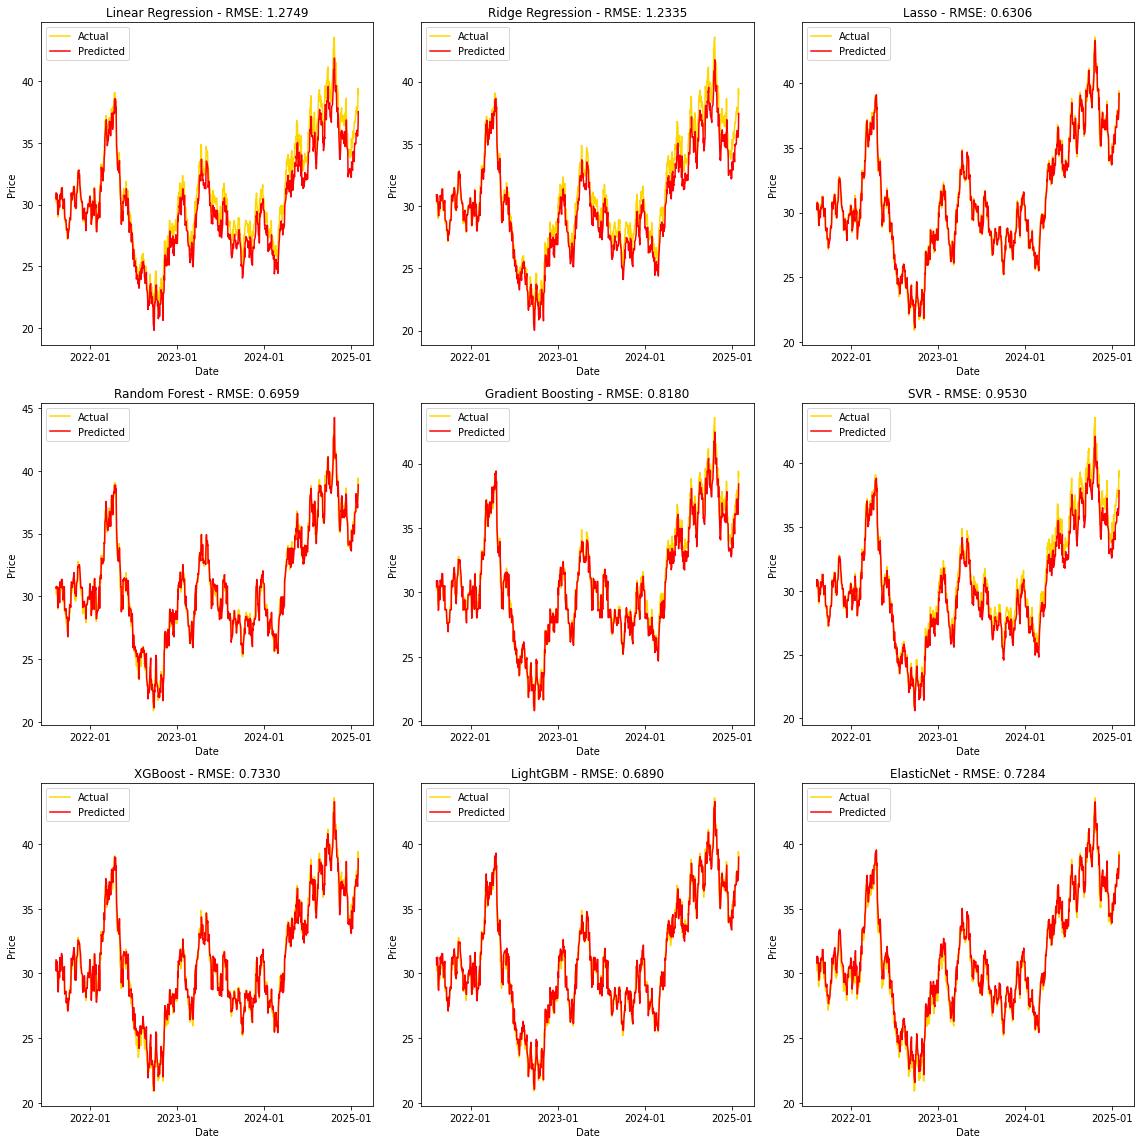

In [30]:
model_comparison(models, X_train_scaled, X_test_scaled, y_train, y_test)

In [31]:
import os
from joblib import dump

model_save_folder = "model_files"
os.makedirs(model_save_folder, exist_ok=True)

for model_name, model_obj in models.items():
    filename = f"{model_name}.pkl"
    filepath = os.path.join(model_save_folder, filename)
    dump(model_obj, filepath)
    print(f"Saved {model_name} to {filepath}")

Saved Linear Regression to model_files/Linear Regression.pkl
Saved Ridge Regression to model_files/Ridge Regression.pkl
Saved Lasso to model_files/Lasso.pkl
Saved Random Forest to model_files/Random Forest.pkl
Saved Gradient Boosting to model_files/Gradient Boosting.pkl
Saved SVR to model_files/SVR.pkl
Saved XGBoost to model_files/XGBoost.pkl
Saved LightGBM to model_files/LightGBM.pkl
Saved ElasticNet to model_files/ElasticNet.pkl


# Hyperparameter_Tuning.ipynb

In [9]:
#!pip install xgboost lightgbm

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import numpy as np
import joblib

In [13]:


def tune_hyperparameters(X_train, y_train):
    """
    Tune hyperparameters for Lasso Regression, Random Forest, and LightGBM.

    Parameters:
    X_train (pd.DataFrame): Training features
    y_train (pd.Series): Training target variable

    Returns:
    dict: Dictionary with best models and their hyperparameters
    """

    results = {}
    
    # Lasso Regression
    print("\n🔍 Tuning Lasso Regression...")
    lasso = Lasso()
    lasso_params = {'alpha': np.logspace(-4, 1, 10)}
    lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    lasso_grid.fit(X_train, y_train)
    results['Lasso'] = lasso_grid.best_estimator_
    print(f"✅ Best Lasso Parameters: {lasso_grid.best_params_}")

    # Random Forest
    print("\n🔍 Tuning Random Forest...")
    rf = RandomForestRegressor(random_state=42)
    rf_params = {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
    }
    rf_grid = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    rf_grid.fit(X_train, y_train)
    results['Random Forest'] = rf_grid.best_estimator_
    print(f"✅ Best Random Forest Parameters: {rf_grid.best_params_}")

    # LightGBM
    print("\n🔍 Tuning LightGBM...")
    lgbm = lgb.LGBMRegressor(random_state=42)
    lgbm_params = {
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 500],
        'max_depth': [-1, 10, 20],
        'num_leaves': [31, 50, 100],
    }
    lgbm_grid = RandomizedSearchCV(lgbm, lgbm_params, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    lgbm_grid.fit(X_train, y_train)
    results['LightGBM'] = lgbm_grid.best_estimator_
    print(f"✅ Best LightGBM Parameters: {lgbm_grid.best_params_}")

    return results, lasso_grid, rf_grid, lgbm_grid

In [46]:
# Assuming X_train and y_train are already defined
best_models, lasso_grid, rf_grid, lgbm_grid = tune_hyperparameters(X_train, y_train)

# Save the best models for evaluation
for name, model in best_models.items():
    joblib.dump(model, f"model_files/best_{name.lower()}_model.pkl")




🔍 Tuning Lasso Regression...


KeyboardInterrupt: KeyboardInterrupt

In [48]:
import X_test
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the saved best models instead of retraining
lasso_model = joblib.load("model_files/best_lasso_model.pkl")
rf_model = joblib.load("model_files/best_random_forest_model.pkl")
lgbm_model = joblib.load("model_files/best_lightgbm_model.pkl")
linear_model = joblib.load("model_files/linear_regression_model.pkl")

# Predict on X_test using the saved models
lasso_preds = lasso_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
lgbm_preds = lgbm_model.predict(X_test)
linear_preds = linear_model.predict(X_test)

# Calculate RMSE for each model
rmse_scores = {
    'Lasso': np.sqrt(mean_squared_error(y_test, lasso_preds)),
    'Random Forest': np.sqrt(mean_squared_error(y_test, rf_preds)),
    'LightGBM': np.sqrt(mean_squared_error(y_test, lgbm_preds))
    
}

# Print updated RMSE scores
print("\n📊 Model RMSE Scores After Loading Saved Models:")
for model, rmse in rmse_scores.items():
    print(f"✅ {model}: {rmse:.4f}")

# Define models
models = ['Lasso', 'Random Forest', 'LightGBM']

# RMSE values (Before tuning, manually set from previous results)
rmse_before_tuning = [0.6306, 0.6959, 0.6890]

# RMSE values (After tuning, from our new calculations)
rmse_after_tuning = list(rmse_scores.values())  # Uses the computed RMSE values

# Create a bar plot to compare RMSE
x = range(len(models))
plt.bar(x, rmse_before_tuning, width=0.4, label='Before Tuning', align='center')
plt.bar([i + 0.4 for i in x], rmse_after_tuning, width=0.4, label='After Tuning', align='center')

plt.xticks([i + 0.2 for i in x], models)
plt.ylabel('RMSE')
plt.title('Model Performance Before and After Tuning')
plt.legend()
plt.show()

NameError: NameError: name 'X_test' is not defined

# feature_selection.ipynb

In [32]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [33]:
# Load pre-tuned models from .pkl files
lasso_model = joblib.load("model_files/Lasso.pkl")
rf_model = joblib.load("model_files/Random Forest.pkl")
lgbm_model = joblib.load("model_files/LightGBM.pkl")
linear_model = joblib.load("model_files/Linear Regression.pkl")

# Initialize feature selection models
selector = SelectFromModel(lasso_model, prefit=True)

rf_importance = pd.Series(rf_model.feature_importances_, index=X_train_scaled.columns)

# Select features with Lasso
selected_lasso_features = X_train_scaled.columns[selector.get_support()]

# Select top 20 features from Random Forest (adjust as needed)
top_rf_features = rf_importance.nlargest(20).index

# Modify selection: Union of Lasso and RF top features instead of intersection
combined_features = list(set(selected_lasso_features).union(set(top_rf_features)))

# Ensure at least 10 features are included (fallback: use RF’s most important features)
if len(combined_features) < 10:
    additional_features = rf_importance.nlargest(10 - len(combined_features)).index
    combined_features = list(set(combined_features).union(set(additional_features)))

# Print selected features
print(f"✅ Selected Features ({len(combined_features)} total):")
print(combined_features)





✅ Selected Features (20 total):
['GDX_Close', 'GDX_Low', 'USO_Volume', 'GLD_Volume', '%D', 'SLV_Volume', '^XAU_Close', '%K', 'SMA_Volume_20', 'SPY_Volume', 'MACD_Signal', 'GDX_Open', 'Gold_GDX_Corr_60', 'GDX_High', 'ATR', 'Gold_GDX_Corr_30', 'GDX_Volume', 'RSI', 'MACD', '%J']


In [34]:
# Save selected features to a CSV file for reuse
pd.Series(combined_features).to_csv("model_files/selected_features.csv", index=False)

# Load the trained feature set from when models were originally trained
trained_features = list(X_train_scaled.columns)  # Features from training dataset before selection

# Intersect selected features with the original trained feature set
final_features = list(set(combined_features).intersection(set(trained_features)))

# Subset training and testing sets with corrected feature selection
X_train_selected = X_train_scaled[final_features]
X_test_selected = X_test_scaled[final_features]

print(f"✅ Selected features now match trained models: {len(X_train_selected.columns)} features used")

# Save updated datasets
X_train_selected.to_csv("model_files/X_train_selected.csv")
X_test_selected.to_csv("model_files/X_test_selected.csv")

✅ Selected features now match trained models: 20 features used


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 3664, number of used features: 20
[LightGBM] [Info] Start training from score 30.214693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.965e+01, tolerance: 4.759e+01
  model = cd_fast.enet_coordinate_descent(


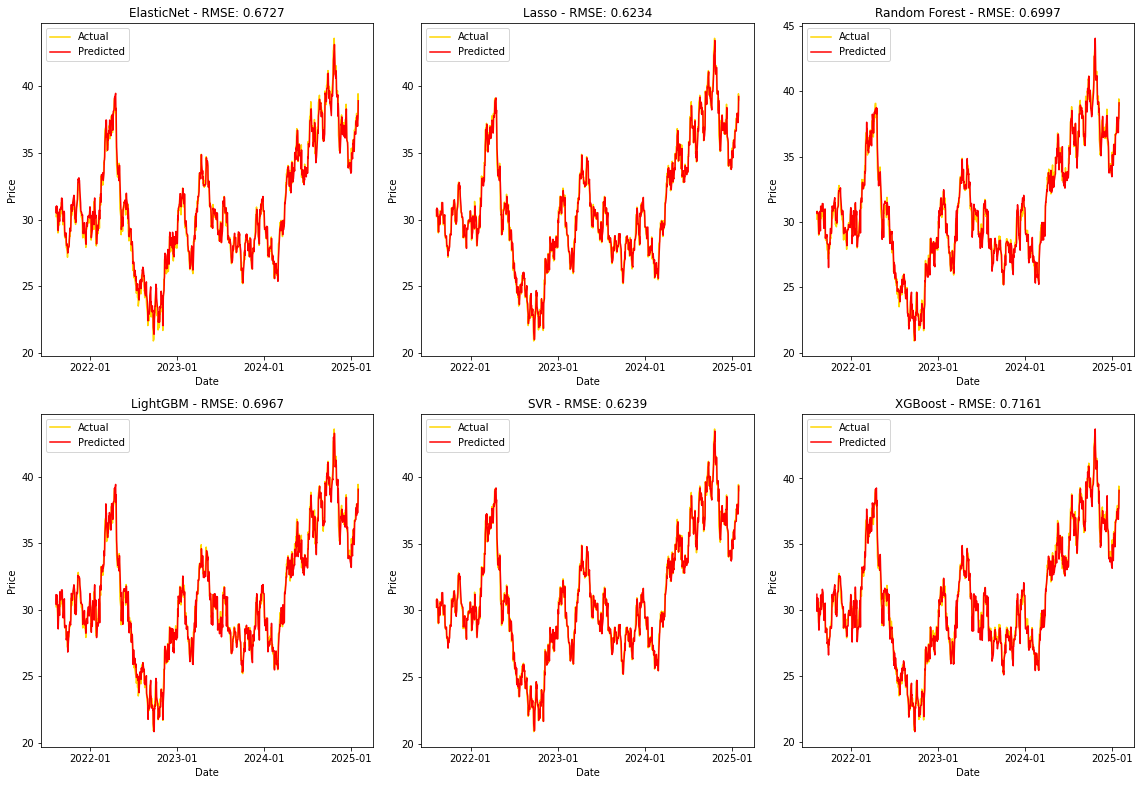

In [123]:
# Define models again (using saved versions)
updated_models = {
    "ElasticNet": joblib.load("model_files/elasticnet_model.pkl"),
    "Lasso": joblib.load("model_files/Lasso.pkl"),
    "Random Forest": joblib.load("model_files/Random Forest.pkl"),
    "LightGBM": joblib.load("model_files/LightGBM.pkl"),
    "SVR": joblib.load("model_files/svr_model.pkl"),
    "XGBoost": joblib.load("model_files/xgboost_model.pkl")

}

# Run model comparison using only the selected features
selected_feature_rmse = model_comparison(updated_models, X_train_selected, X_test_selected, y_train, y_test)


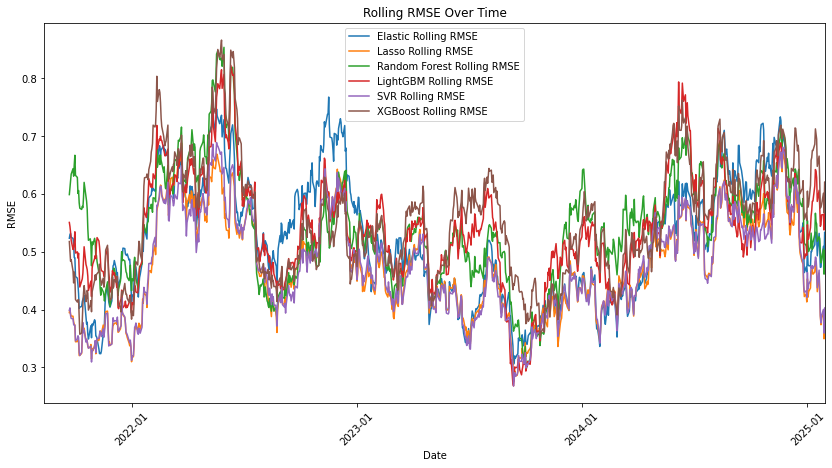

In [124]:
# Load updated models
lasso_model = joblib.load("model_files/lasso_model.pkl")
rf_model = joblib.load("model_files/random_forest_model.pkl")
lgbm_model = joblib.load("model_files/lightgbm_model.pkl")
elastic_model = joblib.load("model_files/elasticnet_model.pkl")
svr_model = joblib.load("model_files/svr_model.pkl")
xgboost_model = joblib.load("model_files/xgboost_model.pkl")

# Predict on X_test using the saved models
lasso_preds = lasso_model.predict(X_test_selected)
rf_preds = rf_model.predict(X_test_selected)
lgbm_preds = lgbm_model.predict(X_test_selected)
elastic_preds = elastic_model.predict(X_test_selected)
svr_preds = svr_model.predict(X_test_selected)
xgboost_preds = xgboost_model.predict(X_test_selected)

# Plot actual vs predicted
import matplotlib.dates as mdates

# Ensure index is in datetime format
if not isinstance(y_test.index, pd.DatetimeIndex):
    y_test.index = pd.to_datetime(y_test.index)

window_size = 30  # Rolling window length

rolling_rmse = {
    'Elastic': np.sqrt((y_test - elastic_preds) ** 2).rolling(window_size).mean(),
    'Lasso': np.sqrt((y_test - lasso_preds) ** 2).rolling(window_size).mean(),
    'Random Forest': np.sqrt((y_test - rf_preds) ** 2).rolling(window_size).mean(),
    'LightGBM': np.sqrt((y_test - lgbm_preds) ** 2).rolling(window_size).mean(),
    'SVR': np.sqrt((y_test - svr_preds) ** 2).rolling(window_size).mean(),
    'XGBoost': np.sqrt((y_test - xgboost_preds) ** 2).rolling(window_size).mean()
}

plt.figure(figsize=(14, 7))

for model, rmse_series in rolling_rmse.items():
    plt.plot(y_test.index, rmse_series, label=f'{model} Rolling RMSE')

plt.xlabel('Date')
plt.ylabel('RMSE')
plt.title('Rolling RMSE Over Time')
plt.legend()

# Fix X-axis ticks to match real data range
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Mark every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Display as YYYY-MM

# Ensure correct x-axis range
plt.xlim([y_test.index.min(), y_test.index.max()])

plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()


# backtest_model.ipynb

In [105]:

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from IPython.display import display

In [132]:
models = {
    "ElasticNet": joblib.load("model_files/elasticnet_model.pkl"),
    "Lasso": joblib.load("model_files/lasso_model.pkl"),
    "Random Forest": joblib.load("model_files/random_forest_model.pkl"),
    "LightGBM": joblib.load("model_files/lightgbm_model.pkl"),
    "SVR": joblib.load("model_files/svr_model.pkl"),
    "XGBoost": joblib.load("model_files/xgboost_model.pkl")
}

In [155]:
# Recombine training and test features and targets
X_full = pd.concat([X_train_selected, X_test_selected])
Y_full = pd.concat([y_train, y_test])

# Ensure index is in datetime format before sorting
X_full.index = pd.to_datetime(X_full.index)
Y_full.index = pd.to_datetime(Y_full.index)

# Now sort safely
X_full = X_full.sort_index()
y_full = Y_full.sort_index()




In [42]:
def calculate_backtest_metrics(trade_log, initial_capital):
    """
    Calculates key backtest metrics from the trade log.
    """

    if trade_log.empty:
        return {
            "P/L ($)": 0,
            "CAGR (%)": 0,
            "Max Drawdown (%)": 0,
            "Win %": 0,
            "Capture Rate (%)": 0,
            "Starting Capital ($)": initial_capital,
            "Ending Capital ($)": initial_capital,
            "Max Funds ($)": initial_capital,
            "Min Funds ($)": initial_capital,
            "Avg Per Trade ($)": 0,
            "Avg Winner ($)": 0,
            "Avg Loser ($)": 0,
            "Max Winner ($)": 0,
            "Max Loser ($)": 0,
            "Avg Days in Trade": 0,
            "Total Trades": 0,
            "Winning Trades": 0,
        }

    # ✅ **Fix: Check if 'Balance After' exists, otherwise use 'Balance'**
    balance_col = "Balance After" if "Balance After" in trade_log.columns else "Balance"

    final_balance = trade_log[balance_col].iloc[-1]
    max_funds = trade_log[balance_col].max()
    min_funds = trade_log[balance_col].min()

    # **Filter only actual trades**
    actual_trades = trade_log[trade_log["Position Size"] != 0]

    # P/L
    total_pnl = final_balance - initial_capital

    # CAGR Calculation
    years = (trade_log["Date"].iloc[-1] - trade_log["Date"].iloc[0]).days / 365
    cagr = ((final_balance / initial_capital) ** (1 / years) - 1) * 100 if years > 0 else 0

    # Max Drawdown Calculation
    peak = trade_log[balance_col].cummax()
    drawdown = (trade_log[balance_col] - peak) / peak
    max_drawdown = drawdown.min() * 100  # In percentage

    # Win Percentage
    total_trades = actual_trades.shape[0]  
    winners = actual_trades[actual_trades["P/L"] > 0].shape[0]
    win_percentage = (winners / total_trades) * 100 if total_trades > 0 else 0

    # Capture Rate
    capture_rate = (total_pnl / max_funds) * 100 if max_funds > 0 else 0

    # Trade Stats
    avg_per_trade = total_pnl / total_trades if total_trades > 0 else 0
    avg_winner = actual_trades[actual_trades["P/L"] > 0]["P/L"].mean()
    avg_loser = actual_trades[actual_trades["P/L"] < 0]["P/L"].mean()
    max_winner = actual_trades["P/L"].max()
    max_loser = actual_trades["P/L"].min()

    return {
        "P/L ($)": round(total_pnl, 2),
        "CAGR (%)": round(cagr, 2),
        "Max Drawdown (%)": round(max_drawdown, 2),
        "Win %": round(win_percentage, 2),
        "Capture Rate (%)": round(capture_rate, 2),
        "Starting Capital ($)": initial_capital,
        "Ending Capital ($)": round(final_balance, 2),
        "Max Funds ($)": round(max_funds, 2),
        "Min Funds ($)": round(min_funds, 2),
        "Avg Per Trade ($)": round(avg_per_trade, 2),
        "Avg Winner ($)": round(avg_winner, 2) if not pd.isna(avg_winner) else 0,
        "Avg Loser ($)": round(avg_loser, 2) if not pd.isna(avg_loser) else 0,
        "Max Winner ($)": round(max_winner, 2),
        "Max Loser ($)": round(max_loser, 2),
        "Avg Days in Trade": 0,  
        "Total Trades": total_trades,
        "Winning Trades": winners,
    }

In [53]:
def highlight_performance(series):
    """
    Applies a smooth red–green gradient to each numeric column (except 'Starting Capital ($)').
    For columns in 'lower_is_better', smaller absolute values appear greener (i.e. "better").
    For all other numeric columns, higher values are greener.
    """
    col_name = series.name
    
    # Skip non-numeric columns or "Starting Capital ($)"
    if not pd.api.types.is_numeric_dtype(series) or col_name == "Starting Capital ($)":
        return [""] * len(series)
    
    # Columns where smaller (absolute) values are better
    lower_is_better = [
        "Max Drawdown (%)",
        "Max Drawdown ($)",
        "Max Loser ($)",
        "Avg Loser ($)",
        # Add more if needed
    ]
    
    # Handle the case where there's no variation
    col_min, col_max = series.min(), series.max()
    if col_min == col_max:
        return ["background-color: #FFFFFF"] * len(series)
    
    # -----------------------------------------------
    # If this is a "lower_is_better" column, we base
    # the gradient on absolute values so that a 
    # "less negative" or "smaller positive" is greener.
    # -----------------------------------------------
    if col_name in lower_is_better:
        abs_values = series.abs()
        abs_min, abs_max = abs_values.min(), abs_values.max()
        
        # If no variation in absolute values, return white
        if abs_min == abs_max:
            return ["background-color: #FFFFFF"] * len(series)
        
        def color_for_value(x):
            # ratio=0 => best => green, ratio=1 => worst => red
            ratio = (abs(x) - abs_min) / (abs_max - abs_min)
            r = int(255 * ratio)
            g = int(255 * (1 - ratio))
            return f"background-color: rgba({r}, {g}, 0, 0.5)"
    
    else:
        # For columns where higher is better:
        range_ = col_max - col_min
        if range_ == 0:
            return ["background-color: #FFFFFF"] * len(series)
        
        def color_for_value(x):
            # ratio=0 => red, ratio=1 => green
            ratio = (x - col_min) / range_
            r = int(255 * (1 - ratio))
            g = int(255 * ratio)
            return f"background-color: rgba({r}, {g}, 0, 0.5)"
    
    return [color_for_value(x) for x in series]

# ---------------------------------------------------
# Reorder columns: Move "Model" and "Strategy" left
# ---------------------------------------------------
cols = ["Model", "Strategy"] + [
    col for col in backtest_summary_df.columns
    if col not in ["Model", "Strategy"]
]
backtest_summary_df = backtest_summary_df[cols]

# ---------------------------------------------------
# Sort the DataFrame by "Ending Capital ($)" descending
# ---------------------------------------------------
backtest_summary_df = backtest_summary_df.sort_values(
    by="Ending Capital ($)", 
    ascending=False
)

# ---------------------------------------------------
# Apply the styling and hide the index column
# ---------------------------------------------------
styled = backtest_summary_df.style.apply(highlight_performance, axis=0).hide_index()

# Display in Jupyter (or IPython) notebook
display(styled)

<ipython-input-53-8fa56fd00b74>:82: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  styled = backtest_summary_df.style.apply(highlight_performance, axis=0).hide_index()


Model,Strategy,P/L ($),CAGR (%),Max Drawdown (%),Win %,Capture Rate (%),Starting Capital ($),Ending Capital ($),Max Funds ($),Min Funds ($),Avg Per Trade ($),Avg Winner ($),Avg Loser ($),Max Winner ($),Max Loser ($),Avg Days in Trade,Total Trades,Winning Trades
LightGBM,Full Strategy,-1935.090000,-0.040000,-2.720000,47.810000,-0.130000,1500000,1498064.910000,1535864.480000,1473990.180000,-7.060000,2286.080000,-2107.770000,10306.950000,-9897.510000,0,274,131
Linear Regression,Full Strategy,-13239.250000,-0.260000,-3.040000,47.960000,-0.860000,1500000,1486760.750000,1533423.380000,1481435.100000,-49.220000,2070.920000,-2002.770000,6920.350000,-10473.290000,0,269,129
Random Forest,Full Strategy,-19665.080000,-0.380000,-4.400000,47.670000,-1.290000,1500000,1480334.920000,1525567.730000,1458383.340000,-76.220000,2078.770000,-2039.660000,6258.530000,-10255.120000,0,258,123
Lasso,Full Strategy,-20038.390000,-0.390000,-2.830000,48.300000,-1.320000,1500000,1479961.610000,1523016.490000,1479961.610000,-75.620000,1942.460000,-1961.120000,6775.610000,-9855.040000,0,265,128
Lasso,Confidence Weighted,-91487.310000,-1.800000,-7.340000,44.280000,-6.030000,1500000,1408512.690000,1516042.040000,1404711.500000,-112.530000,1475.610000,-1374.630000,6549.050000,-9506.460000,0,813,360
LightGBM,Confidence Weighted,-94806.920000,-1.860000,-8.070000,43.090000,-6.260000,1500000,1405193.080000,1513906.360000,1391807.560000,-117.050000,1632.800000,-1441.760000,10032.110000,-9638.580000,0,810,349
Linear Regression,Confidence Weighted,-97939.020000,-1.930000,-7.350000,44.250000,-6.480000,1500000,1402060.980000,1510877.000000,1399784.160000,-119.730000,1497.480000,-1403.570000,6656.280000,-9887.910000,0,818,362
Lasso,Baseline,-102147.480000,-2.010000,-8.260000,44.280000,-6.760000,1500000,1397852.520000,1511421.580000,1386506.060000,-125.640000,1539.240000,-1448.730000,6794.340000,-9719.180000,0,813,360
Linear Regression,Baseline,-106334.920000,-2.100000,-7.850000,44.250000,-7.060000,1500000,1393665.080000,1506586.360000,1388283.230000,-129.990000,1527.190000,-1445.560000,6846.780000,-9794.200000,0,818,362
LightGBM,Baseline,-114951.120000,-2.270000,-9.350000,43.090000,-7.610000,1500000,1385048.880000,1510610.000000,1369421.580000,-141.910000,1556.980000,-1428.070000,6867.000000,-9825.370000,0,810,349


In [140]:
# Load benchmark data

# Define the date range matching your backtest period (adjust as needed)
start_date = "2007-02-1"
end_date = "2025-02-1"

# Download benchmark data from yfinance
# GDX: VanEck Vectors Gold Miners ETF
# GLD: SPDR Gold Shares (gold spot proxy)
# SPY: SPDR S&P 500 ETF Trust (S&P 500 proxy)
gdx_data = yf.download("GDX", start=start_date, end=end_date).reset_index()
gld_data = yf.download("GLD", start=start_date, end=end_date).reset_index()
spy_data = yf.download("SPY", start=start_date, end=end_date).reset_index()

# For consistency, ensure that the benchmark DataFrames have the columns we need:
# We'll assume we use "Date" and "Close" for GDX and SPY,
# and for gold, we can use GLD's "Close" as a proxy for gold spot price.
gdx_data.rename(columns={"Close": "Close"}, inplace=True)  # remains same
gld_data.rename(columns={"Close": "Price"}, inplace=True)    # rename GLD Close to Price
spy_data.rename(columns={"Close": "Close"}, inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

def plot_performance_by_model(
    baseline_trades_all,
    conf_weighted_trades_all,
    full_strategy_trades_all,
    gdx_data,
    gld_data,
    spy_data,
    initial_capital=1500000
):
    """
    Creates 4 subplots (2x2) - one subplot per model in baseline_trades_all.keys().
    Each subplot overlays:
      - Baseline strategy results (in USD)
      - Confidence Weighted strategy results (in USD)
      - Full Strategy results (in USD)
      - GDX, GLD, SPY benchmark curves (also scaled to start at 'initial_capital')
      - A dashed horizontal line for initial_capital

    This version:
      - Clips the benchmark data to match the earliest model date
      - Formats the y-axis in millions of USD
      - Makes benchmark lines more transparent via alpha

    Parameters
    ----------
    baseline_trades_all : dict {model_name -> pd.DataFrame}
        DataFrames each with columns ["Date", "Balance"] in USD.
    conf_weighted_trades_all : dict {model_name -> pd.DataFrame}
        DataFrames each with columns ["Date", "Balance"] in USD.
    full_strategy_trades_all : dict {model_name -> pd.DataFrame}
        DataFrames each with columns ["Date", "Balance"] in USD.
    gdx_data : pd.DataFrame
        Columns ["Date", "Close"] for GDX.
    gld_data : pd.DataFrame
        Columns ["Date", "Price"] for GLD (gold spot).
    spy_data : pd.DataFrame
        Columns ["Date", "Close"] for SPY.
    initial_capital : float, optional
        Starting balance line for reference (default=1500000).
    """

    # 1) Convert benchmark "Date" columns to datetime if not already
    for df in [gdx_data, gld_data, spy_data]:
        df["Date"] = pd.to_datetime(df["Date"])

    # 2) Gather all model data min/max date
    model_names = list(baseline_trades_all.keys())
    model_dates = []
    for m in model_names:
        model_dates.append(baseline_trades_all[m]["Date"].min())
        model_dates.append(baseline_trades_all[m]["Date"].max())
        model_dates.append(conf_weighted_trades_all[m]["Date"].min())
        model_dates.append(conf_weighted_trades_all[m]["Date"].max())
        model_dates.append(full_strategy_trades_all[m]["Date"].min())
        model_dates.append(full_strategy_trades_all[m]["Date"].max())

    overall_min_date = min(model_dates)
    overall_max_date = max(model_dates)

    # 3) Clip each benchmark to [overall_min_date, overall_max_date]
    def scale_benchmark(df, date_col, price_col="Close", init_cap=initial_capital):
        df = df.sort_values(date_col).reset_index(drop=True)
        df = df[(df[date_col] >= overall_min_date) & (df[date_col] <= overall_max_date)]
        df.reset_index(drop=True, inplace=True)

        if df.empty:
            df["Scaled"] = np.nan
            return df

        first_val = float(df.iloc[0][price_col])
        if abs(first_val) < 1e-12:
            first_val = 1e-9
        df["Scaled"] = df[price_col] * (init_cap / first_val)
        return df

    gdx_data = scale_benchmark(gdx_data, "Date", "Close", initial_capital)
    gld_data = scale_benchmark(gld_data, "Date", "Price", initial_capital)
    spy_data = scale_benchmark(spy_data, "Date", "Close", initial_capital)

    # 4) Create figure and subplots
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
    axes = axes.flatten()

    # 5) For each model, plot
    for i, model_name in enumerate(model_names):
        ax = axes[i]

        baseline_df = baseline_trades_all[model_name].sort_values("Date")
        conf_df = conf_weighted_trades_all[model_name].sort_values("Date")
        full_df = full_strategy_trades_all[model_name].sort_values("Date")

        baseline_df = baseline_df[
            (baseline_df["Date"] >= overall_min_date) & (baseline_df["Date"] <= overall_max_date)
        ]
        conf_df = conf_df[
            (conf_df["Date"] >= overall_min_date) & (conf_df["Date"] <= overall_max_date)
        ]
        full_df = full_df[
            (full_df["Date"] >= overall_min_date) & (full_df["Date"] <= overall_max_date)
        ]

        # Plot each strategy's equity curve
        ax.plot(baseline_df["Date"], baseline_df["Balance"], label="Baseline", color="blue")
        ax.plot(conf_df["Date"], conf_df["Balance"], label="Confidence Weighted", color="orange")
        ax.plot(full_df["Date"], full_df["Balance"], label="Full Strategy", color="green")

        # Plot scaled benchmark curves with alpha for transparency
        ax.plot(gdx_data["Date"], gdx_data["Scaled"], label="GDX", color="red", linewidth=1.5, alpha=0.25)
        ax.plot(gld_data["Date"], gld_data["Scaled"], label="GLD", color="gold", linewidth=1.5, alpha=0.25)
        ax.plot(spy_data["Date"], spy_data["Scaled"], label="SPY", color="purple", linewidth=1.5, alpha=0.25)

        # Starting capital line
        ax.axhline(initial_capital, color="gray", linestyle="--", label="Starting Capital")

        # Title, labels, legend
        ax.set_title(f"{model_name} - 3 Strategies vs Benchmarks")
        ax.set_xlabel("Date")
        ax.set_ylabel("Account Value (USD, Millions)")

        # Format x-axis date labels
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

        # Force x-limits from overall earliest to latest date
        ax.set_xlim([overall_min_date, overall_max_date])

        # Format the y-axis to show e.g. "1.5" as "1.50M"
        ax.yaxis.set_major_formatter(
            mticker.FuncFormatter(lambda x, p: f"{x/1e6:.2f}M")
        )

        ax.legend(loc="best")

    # Hide unused subplots if fewer than 4 models
    for j in range(len(model_names), 4):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

<ipython-input-138-bcbc7ef860a6>:99: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  styled = backtest_summary_df.style.apply(highlight_performance, axis=0).hide_index()


Model,Strategy,P/L ($),CAGR (%),Max Drawdown (%),Win %,Capture Rate (%),Starting Capital ($),Ending Capital ($),Max Funds ($),Min Funds ($),Avg Per Trade ($),Avg Winner ($),Avg Loser ($),Max Winner ($),Max Loser ($),Avg Days in Trade,Total Trades,Winning Trades
LightGBM,Full Strategy,-1078.070000,-0.030000,-2.720000,47.810000,-0.110000,1000000,998921.930000,1024126.630000,982637.050000,-3.930000,1529.420000,-1408.620000,6872.760000,-6599.740000,0,274,131
SVR,Full Strategy,-9740.770000,-0.280000,-3.180000,47.410000,-0.950000,1000000,990259.230000,1020067.290000,984435.300000,-36.080000,1353.120000,-1288.310000,5265.840000,-7116.900000,0,270,128
ElasticNet,Full Strategy,-10654.390000,-0.310000,-3.460000,47.430000,-1.040000,1000000,989345.610000,1024814.450000,989345.610000,-39.170000,1309.030000,-1255.380000,5388.520000,-10142.240000,0,272,129
Random Forest,Full Strategy,-12887.040000,-0.370000,-4.420000,47.670000,-1.270000,1000000,987112.960000,1017047.580000,972140.330000,-49.950000,1398.150000,-1369.330000,4205.170000,-6941.480000,0,258,123
Lasso,Full Strategy,-13300.110000,-0.380000,-2.830000,48.300000,-1.310000,1000000,986699.890000,1015437.490000,986699.890000,-50.190000,1298.480000,-1310.260000,4523.410000,-6570.630000,0,265,128
XGBoost,Full Strategy,-39080.250000,-1.140000,-5.410000,45.790000,-3.850000,1000000,960919.750000,1015888.810000,960919.750000,-143.150000,1384.910000,-1433.740000,4869.960000,-6941.480000,0,273,125
ElasticNet,Baseline,-50974.080000,-1.500000,-6.200000,44.590000,-5.080000,1000000,949025.920000,1003864.720000,941657.010000,-59.970000,1088.780000,-984.330000,4957.440000,-6780.320000,0,850,379
ElasticNet,Confidence Weighted,-51858.440000,-1.520000,-6.100000,44.590000,-5.140000,1000000,948141.560000,1008635.700000,947079.050000,-61.010000,1028.030000,-937.330000,5357.690000,-10102.670000,0,850,379
XGBoost,Baseline,-61319.250000,-1.810000,-7.480000,44.540000,-6.060000,1000000,938680.750000,1012373.340000,936625.250000,-74.420000,1068.010000,-991.860000,4739.370000,-6780.320000,0,824,367
LightGBM,Confidence Weighted,-64320.720000,-1.900000,-8.360000,43.400000,-6.360000,1000000,935679.280000,1011332.550000,926758.140000,-76.480000,1107.810000,-984.600000,6865.670000,-6531.040000,0,841,365


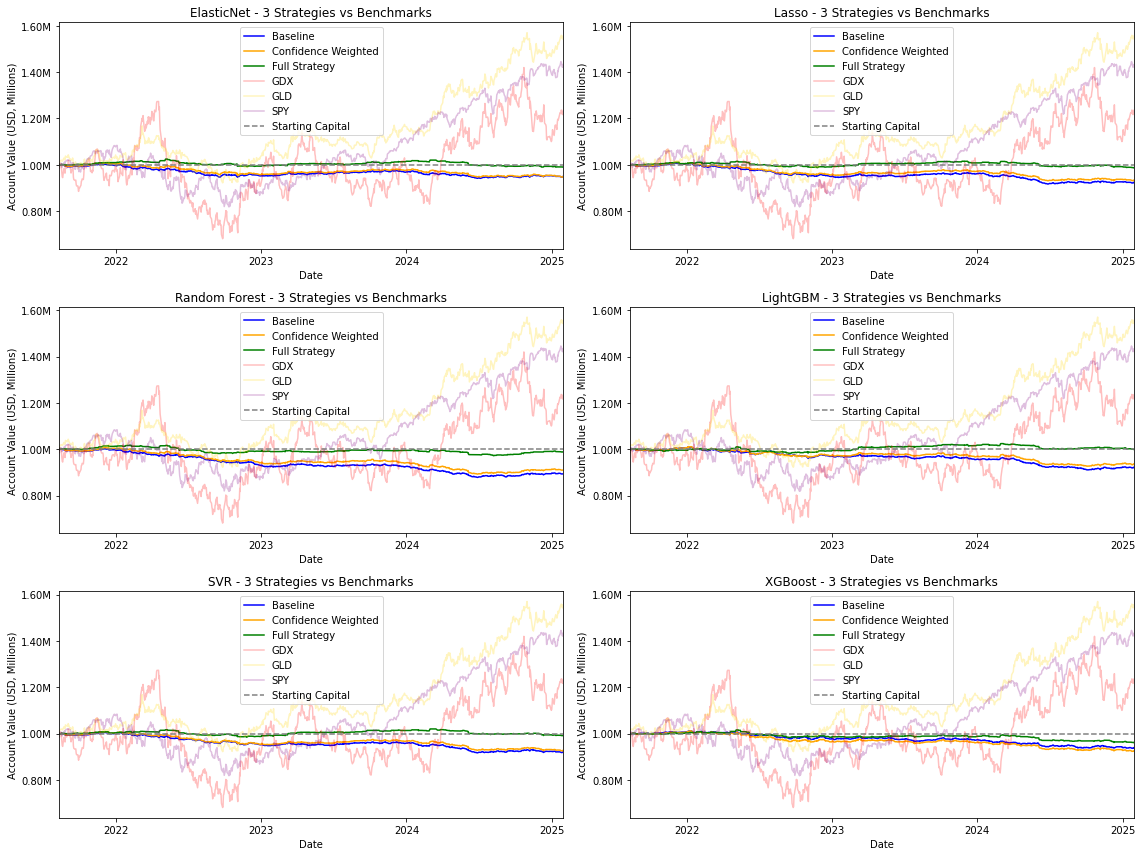

In [138]:
# Initialize empty dicts for each strategy
baseline_trades_dict = {}
conf_weighted_trades_dict = {}
full_strategy_trades_dict = {}

initial_capital = 1000000
volatility_window = 10
signal_threshold = 0.75

backtest_summary = []

for model_name, model in models.items():
    # ----------------------------------------
    # 1) Baseline (original mechanics)
    # ----------------------------------------
    baseline_trades, baseline_final_balance, baseline_num_trades = backtest(
        model=model,
        X_test=X_test_selected,
        y_test=y_test,
        initial_balance=initial_capital,
        window=volatility_window,
        confidence_scaling=False,
        ranking_threshold=0.0,
        dynamic_threshold_percentile=None,
        max_drawdown_stop=None,
        transaction_cost=0.00001,
        slippage=0.0005
    )

    # ----------------------------------------
    # 2) Confidence Weighted (original mechanics)
    # ----------------------------------------
    conf_weighted_trades, conf_weighted_final_balance, conf_weighted_num_trades = backtest(
        model=model,
        X_test=X_test_selected,
        y_test=y_test,
        initial_balance=initial_capital,
        window=volatility_window,
        confidence_scaling=True,
        ranking_threshold=0.0,
        dynamic_threshold_percentile=None,
        max_drawdown_stop=None,
        transaction_cost=0.00001,
        slippage=0.0005
    )

    # ----------------------------------------
    # 3) Full Strategy (enhanced approach)
    # ----------------------------------------
    full_strategy_trades, full_strategy_final_balance, full_strategy_num_trades = backtest(
        model=model,
        X_test=X_test_selected,
        y_test=y_test,
        initial_balance=initial_capital,
        window=volatility_window,
        confidence_scaling=True,
        ranking_threshold=signal_threshold,
        dynamic_threshold_percentile=0.75,
        max_drawdown_stop=0.5,
        transaction_cost=0.00001,
        slippage=0.0005
    )

    # Store the DataFrames in the dicts
    baseline_trades_dict[model_name] = baseline_trades
    conf_weighted_trades_dict[model_name] = conf_weighted_trades
    full_strategy_trades_dict[model_name] = full_strategy_trades

    # Optionally gather metrics
    for strategy_name, trade_log in zip(
        ["Baseline", "Confidence Weighted", "Full Strategy"],
        [baseline_trades, conf_weighted_trades, full_strategy_trades]
    ):
        metrics = calculate_backtest_metrics(trade_log, initial_capital)
        metrics["Model"] = model_name
        metrics["Strategy"] = strategy_name
        backtest_summary.append(metrics)

# Convert the summary list to a DataFrame and display
backtest_summary_df = pd.DataFrame(backtest_summary)

cols = ["Model", "Strategy"] + [
    col for col in backtest_summary_df.columns
    if col not in ["Model", "Strategy"]
]
backtest_summary_df = backtest_summary_df[cols]

# ---------------------------------------------------
# Sort the DataFrame by "Ending Capital ($)" descending
# ---------------------------------------------------
backtest_summary_df = backtest_summary_df.sort_values(
    by="Ending Capital ($)", 
    ascending=False
)

# ---------------------------------------------------
# Apply the styling and hide the index column
# ---------------------------------------------------
styled = backtest_summary_df.style.apply(highlight_performance, axis=0).hide_index()

display(styled)

# Now call the 2x2 plotting function
plot_performance_by_model(
    baseline_trades_all=baseline_trades_dict,
    conf_weighted_trades_all=conf_weighted_trades_dict,
    full_strategy_trades_all=full_strategy_trades_dict,
    gdx_data=gdx_data,
    gld_data=gld_data,
    spy_data=spy_data,
    initial_capital=initial_capital
)

<ipython-input-156-b638f28900ad>:135: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  styled = backtest_summary_df.style.apply(highlight_performance, axis=0).hide_index()


Model,Strategy,P/L ($),CAGR (%),Max Drawdown (%),Win %,Capture Rate (%),Starting Capital ($),Ending Capital ($),Max Funds ($),Min Funds ($),Avg Per Trade ($),Avg Winner ($),Avg Loser ($),Max Winner ($),Max Loser ($),Avg Days in Trade,Total Trades,Winning Trades
Random Forest,Confidence Weighted,52721081.740000,22.990000,-10.850000,72.110000,88.090000,1500000,54221081.740000,59847239.050000,1500000.000000,12292.160000,26885.150000,-25447.070000,583923.390000,-376062.850000,0,4289,3093
Random Forest,Baseline,48741094.920000,22.450000,-11.700000,72.110000,86.890000,1500000,50241094.920000,56095155.080000,1500000.000000,11364.210000,25545.490000,-25310.290000,585389.700000,-360398.850000,0,4289,3093
Random Forest,Full Strategy,14476093.530000,14.620000,-4.400000,84.820000,87.920000,1500000,15976093.530000,16464255.750000,1500000.000000,12631.840000,18026.870000,-17505.890000,184208.930000,-110675.510000,0,1146,972
XGBoost,Confidence Weighted,3842284.610000,7.600000,-8.550000,51.580000,65.850000,1500000,5342284.610000,5835343.680000,1501288.900000,928.310000,5327.480000,-3758.420000,111468.810000,-42256.010000,0,4139,2135
XGBoost,Baseline,3253323.060000,6.880000,-7.350000,51.580000,63.550000,1500000,4753323.060000,5119633.330000,1501718.530000,786.020000,5040.030000,-3746.080000,65759.270000,-33709.600000,0,4139,2135
XGBoost,Full Strategy,2297597.490000,5.500000,-5.370000,55.730000,57.250000,1500000,3797597.490000,4013157.920000,1500000.000000,1880.190000,6273.970000,-3650.600000,80933.370000,-26908.900000,0,1222,681
LightGBM,Confidence Weighted,2030438.290000,5.060000,-8.170000,49.350000,53.280000,1500000,3530438.290000,3810535.380000,1487258.560000,486.450000,3721.470000,-2665.940000,47378.600000,-24262.420000,0,4174,2060
LightGBM,Baseline,1724505.300000,4.510000,-9.480000,49.350000,48.920000,1500000,3224505.300000,3525429.240000,1475078.120000,413.150000,3692.710000,-2782.630000,46430.960000,-22898.680000,0,4174,2060
LightGBM,Full Strategy,1251634.260000,3.560000,-2.720000,51.810000,44.370000,1500000,2751634.260000,2821064.220000,1500000.000000,1029.300000,4453.500000,-2652.000000,38761.440000,-18179.670000,0,1216,630
SVR,Full Strategy,-181505.780000,-0.740000,-15.370000,43.670000,-11.760000,1500000,1318494.220000,1543330.090000,1306097.000000,-134.350000,2353.880000,-2063.460000,19938.260000,-25358.570000,0,1351,590


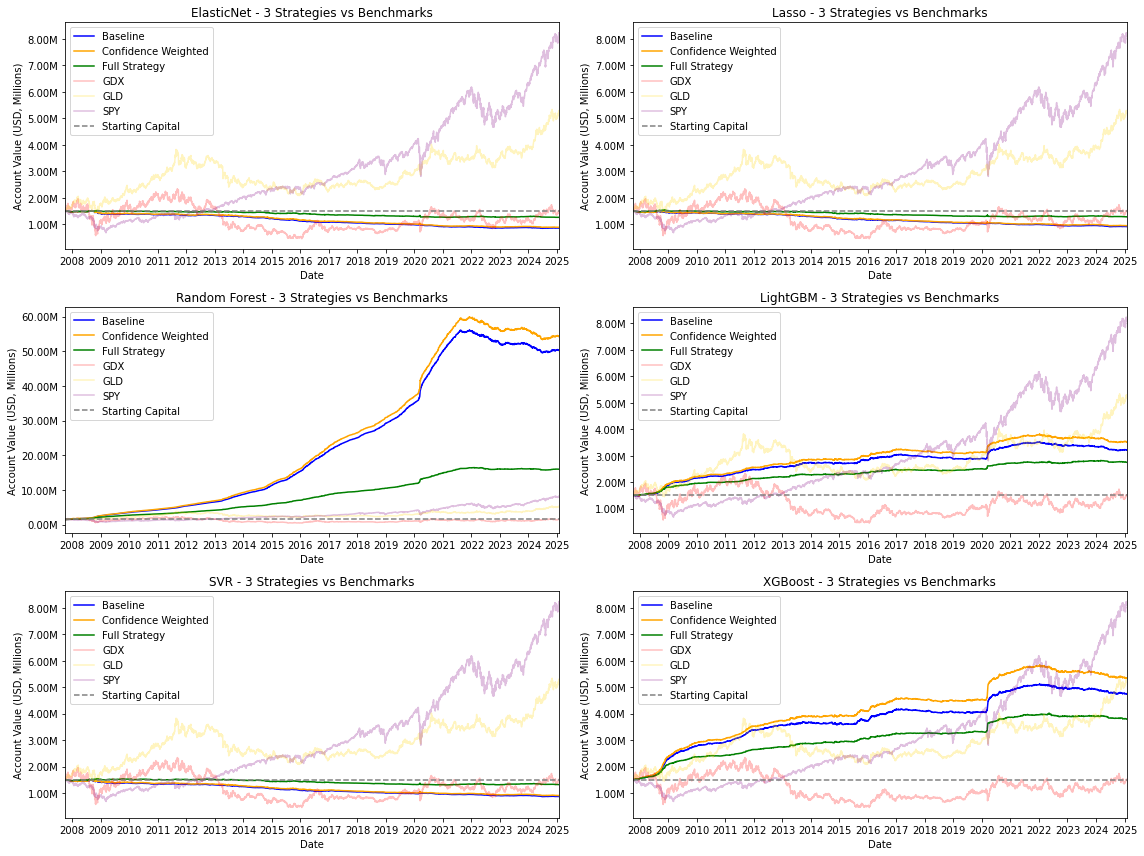

In [156]:
# -------------------------------------
# Full snippet with "Date" -> datetime
# and numeric conversions for all columns
# -------------------------------------

# Initialize empty dicts for each strategy
baseline_trades_dict = {}
conf_weighted_trades_dict = {}
full_strategy_trades_dict = {}

initial_capital = 1500000
volatility_window = 10
signal_threshold = 0.75

backtest_summary = []

# Define columns to convert to numeric if they exist
numeric_cols = [
    "Balance",
    "Open Price",
    "Close Price",
    "Position Size",
    "Shares",
    "Entry Price (slippage)",
    "Exit Price (slippage)",
    "Raw P/L",
    "Transaction Cost",
    "P/L",
    # Add or remove any other numeric columns your metrics function needs
]

for model_name, model in models.items():
    # ----------------------------------------
    # 1) Baseline (original mechanics) on training set
    # ----------------------------------------
    baseline_trades, baseline_final_balance, baseline_num_trades = backtest(
        model=model,
        X_test=X_full,   # Use training set features
        y_test=Y_full,            # Use training set prices/series
        initial_balance=initial_capital,
        window=volatility_window,
        confidence_scaling=False,      # No scaling for baseline
        ranking_threshold=0.0,         # No filtering on signal strength
        dynamic_threshold_percentile=None,
        max_drawdown_stop=None,
        transaction_cost=0.00001,
        slippage=0.0005
    )
    # Convert "Date" to datetime
    baseline_trades["Date"] = pd.to_datetime(baseline_trades["Date"], errors="coerce")
    # Convert numeric columns
    for col in numeric_cols:
        if col in baseline_trades.columns:
            baseline_trades[col] = pd.to_numeric(baseline_trades[col], errors="coerce")

    # ----------------------------------------
    # 2) Confidence Weighted (original mechanics) on training set
    # ----------------------------------------
    conf_weighted_trades, conf_weighted_final_balance, conf_weighted_num_trades = backtest(
        model=model,
        X_test=X_full,
        y_test=Y_full,
        initial_balance=initial_capital,
        window=volatility_window,
        confidence_scaling=True,       # Confidence scaling on
        ranking_threshold=0.0,
        dynamic_threshold_percentile=None,
        max_drawdown_stop=None,
        transaction_cost=0.00001,
        slippage=0.0005
    )
    conf_weighted_trades["Date"] = pd.to_datetime(conf_weighted_trades["Date"], errors="coerce")
    for col in numeric_cols:
        if col in conf_weighted_trades.columns:
            conf_weighted_trades[col] = pd.to_numeric(conf_weighted_trades[col], errors="coerce")

    # ----------------------------------------
    # 3) Full Strategy (enhanced approach) on training set
    # ----------------------------------------
    full_strategy_trades, full_strategy_final_balance, full_strategy_num_trades = backtest(
        model=model,
        X_test=X_full,
        y_test=Y_full,
        initial_balance=initial_capital,
        window=volatility_window,
        confidence_scaling=True,
        ranking_threshold=signal_threshold,
        dynamic_threshold_percentile=0.75,
        max_drawdown_stop=0.5,
        transaction_cost=0.00001,
        slippage=0.0005
    )
    full_strategy_trades["Date"] = pd.to_datetime(full_strategy_trades["Date"], errors="coerce")
    for col in numeric_cols:
        if col in full_strategy_trades.columns:
            full_strategy_trades[col] = pd.to_numeric(full_strategy_trades[col], errors="coerce")

    # Store the resulting trade log DataFrames in the dictionaries
    baseline_trades_dict[model_name] = baseline_trades
    conf_weighted_trades_dict[model_name] = conf_weighted_trades
    full_strategy_trades_dict[model_name] = full_strategy_trades

    # Gather metrics
    for strategy_name, trade_log in zip(
        ["Baseline", "Confidence Weighted", "Full Strategy"],
        [baseline_trades, conf_weighted_trades, full_strategy_trades]
    ):
        metrics = calculate_backtest_metrics(trade_log, initial_capital)
        metrics["Model"] = model_name
        metrics["Strategy"] = strategy_name
        backtest_summary.append(metrics)

# Convert summary to DataFrame
backtest_summary_df = pd.DataFrame(backtest_summary)

# Format Results Table

cols = ["Model", "Strategy"] + [
    col for col in backtest_summary_df.columns
    if col not in ["Model", "Strategy"]
]
backtest_summary_df = backtest_summary_df[cols]

# ---------------------------------------------------
# Sort the DataFrame by "Ending Capital ($)" descending
# ---------------------------------------------------
backtest_summary_df = backtest_summary_df.sort_values(
    by="Ending Capital ($)", 
    ascending=False
)

# ---------------------------------------------------
# Apply the styling and hide the index column
# ---------------------------------------------------
styled = backtest_summary_df.style.apply(highlight_performance, axis=0).hide_index()

display(styled)


# Plot the results (2x2 subplots)
plot_performance_by_model(
    baseline_trades_all=baseline_trades_dict,
    conf_weighted_trades_all=conf_weighted_trades_dict,
    full_strategy_trades_all=full_strategy_trades_dict,
    gdx_data=gdx_data,
    gld_data=gld_data,
    spy_data=spy_data,
    initial_capital=initial_capital
)

In [157]:
# -------------------------------------
# After the loop and summary code:
# -------------------------------------
import os

output_folder = "model_files"
os.makedirs(output_folder, exist_ok=True)

# Export Baseline trades
for model_name, df in baseline_trades_dict.items():
    csv_name = f"baseline_trades_{model_name}.csv"
    df.to_csv(os.path.join(output_folder, csv_name), index=False)

# Export Confidence Weighted trades
for model_name, df in conf_weighted_trades_dict.items():
    csv_name = f"conf_weighted_trades_{model_name}.csv"
    df.to_csv(os.path.join(output_folder, csv_name), index=False)

# Export Full Strategy trades
for model_name, df in full_strategy_trades_dict.items():
    csv_name = f"full_strategy_trades_{model_name}.csv"
    df.to_csv(os.path.join(output_folder, csv_name), index=False)

print(f"Trade logs exported to '{output_folder}' folder.")

Trade logs exported to 'model_files' folder.


In [93]:
import numpy as np
import pandas as pd

def backtest(
    model,
    X_test,
    y_test,
    initial_balance=1000000,
    window=10,
    confidence_scaling=True,
    ranking_threshold=0.0,
    dynamic_threshold_percentile=None,
    max_drawdown_stop=None,
    transaction_cost=0.0001,
    slippage=0.00005
):
    """
    Consolidated backtest function for long/short strategies, with:
      - Confidence scaling (up to 2.0, down to 0.5) if enabled
      - Optional ranking threshold
      - Optional dynamic threshold percentile
      - Optional max drawdown stop
      - Logging of daily trades (one row per day).

    Returns
    -------
    trade_log_df : pd.DataFrame
        DataFrame of each day with columns:
            Date, Open Price, Close Price, Position Size, Shares, P/L, Balance,
            Executed_Trade, Predicted Return, etc.
    final_balance : float
        Account balance after the last trade/day.
    total_trades : int
        The count of actual trades executed (Position Size != 0).
    """

    # 1) Predictions & Rolling Vol
    y_pred = model.predict(X_test)
    y_series = pd.Series(y_test)
    dates = y_series.index

    actual_returns = y_series.pct_change().fillna(0)
    rolling_volatility = actual_returns.rolling(window=window).std().fillna(0.01)

    # Predicted returns: next day's % change from the model's predicted prices
    #   length => (len(y_pred) - 1)
    predicted_returns = np.diff(y_pred) / y_series.iloc[:-1].values

    # 2) Initialize portfolio/logging
    balance = initial_balance
    peak_balance = initial_balance
    total_trades = 0

    trade_log = []

    # 3) Main loop: from day i to day i+1
    n_days = len(y_test)
    for i in range(n_days - 1):
        date_i = dates[i]
        open_price = y_test.iloc[i]
        close_price = y_test.iloc[i + 1]

        # Prepare a dictionary for this day's row. We'll fill it in with skip or trade info:
        daily_dict = {
            "Date": date_i,
            "Open Price": open_price,
            "Close Price": close_price,
            "Position Size": 0.0,
            "Shares": 0.0,
            "Raw P/L": 0.0,
            "Transaction Cost": 0.0,
            "P/L": 0.0,
            "Balance": balance,
            "Executed_Trade": 0,
            "Predicted Return": 0.0,
        }

        # If we have a predicted return for day i:
        if i < len(predicted_returns):
            pred_ret = predicted_returns[i]
        else:
            # No prediction for the last day => skip
            trade_log.append(daily_dict)
            continue

        daily_dict["Predicted Return"] = pred_ret

        # Realized vol
        realized_vol = rolling_volatility.iloc[i]

        # 1) Check if effectively zero predicted return
        if abs(pred_ret) < 0.001:
            # skip trade => do nothing else, just append
            trade_log.append(daily_dict)
            continue

        # 2) Check dynamic threshold filter
        if dynamic_threshold_percentile is not None and i >= window:
            recent_preds = predicted_returns[i - window : i]
            cutoff = np.percentile(np.abs(recent_preds), dynamic_threshold_percentile * 100)
            if np.abs(pred_ret) < cutoff:
                # skip
                trade_log.append(daily_dict)
                # check drawdown stop
                if max_drawdown_stop is not None:
                    dd = (peak_balance - balance) / peak_balance
                    if dd >= max_drawdown_stop:
                        break
                continue

        # 3) Ranking threshold check
        if abs(pred_ret) < ranking_threshold * realized_vol:
            # skip
            trade_log.append(daily_dict)
            # check drawdown
            if max_drawdown_stop is not None:
                dd = (peak_balance - balance) / peak_balance
                if dd >= max_drawdown_stop:
                    break
            continue

        # 4) Confidence scaling => leverage range [0.5..2.0]
        if confidence_scaling:
            ratio = abs(pred_ret) / realized_vol if realized_vol != 0 else 0
            weight = np.clip(ratio, 0.75, 1.49)
        else:
            weight = 1.0

        # 5) Determine direction & position size
        direction = np.sign(pred_ret)  # +1 long, -1 short


        position_size = direction * weight
        daily_dict["Position Size"] = position_size

        # 6) Slippage-Adjusted Fill Prices
        if position_size > 0:
            entry_price = open_price * (1 + slippage)
            exit_price = close_price * (1 - slippage)
        else:
            entry_price = open_price * (1 - slippage)
            exit_price = close_price * (1 + slippage)

        # 7) Calculate Shares & PnL
        capital_alloc = 0.67 * (max(100000, balance*0.1)) * abs(position_size)
        shares = 0.0
        if entry_price != 0:
            shares = capital_alloc / entry_price

        if position_size > 0:  # Long
            raw_pnl = shares * (exit_price - entry_price)
        else:                 # Short
            raw_pnl = shares * (entry_price - exit_price)

        notional_trade = shares * entry_price
        trade_cost = transaction_cost * notional_trade
        pnl_after_costs = raw_pnl - trade_cost

        # 8) Update balance
        balance += pnl_after_costs

        # 9) Update dictionary
        daily_dict["Shares"] = shares
        daily_dict["Entry Price (slippage)"] = entry_price
        daily_dict["Exit Price (slippage)"] = exit_price
        daily_dict["Raw P/L"] = raw_pnl
        daily_dict["Transaction Cost"] = trade_cost
        daily_dict["P/L"] = pnl_after_costs
        daily_dict["Balance"] = balance
        daily_dict["Executed_Trade"] = 1

        # 10) Increase trade count
        total_trades += 1

        # 11) Track peak balance for drawdown
        peak_balance = max(peak_balance, balance)
        if max_drawdown_stop is not None:
            dd = (peak_balance - balance) / peak_balance
            if dd >= max_drawdown_stop:
                trade_log.append(daily_dict)
                break

        # Finally, append the row for the day
        trade_log.append(daily_dict)

    # 4) Build final results
    trade_log_df = pd.DataFrame(trade_log)
    # **Important**: sort by Date in ascending order, then reset_index
    trade_log_df = trade_log_df.sort_values("Date").reset_index(drop=True)

    final_balance = trade_log_df["Balance"].iloc[-1]

    return trade_log_df, final_balance, total_trades